## Solution to the Titanic Problem From Kaggle Using Decisition Tree Classifier(for starters)

***Daniel Pascual***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First things first, let us open the training dataset 

In [3]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**This was the information abut the data we get from kaggle:**
PassengerId
Survival    0 = No, 1 = Yes
Pclass   	Ticket class:	1 = 1st, 2 = 2nd, 3 = 3rd
Name
Sex	
Age 	    in years	
SibSp	    # of siblings / spouses aboard the Titanic	
Parch	    # of parents / children aboard the Titanic	
ticket	    Ticket number	
fare	    Passenger fare	
cabin	    Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
df.shape

(891, 12)

We have information about 891 passengers, with 12 columns

Let us see the column types

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Nothing stands out so far, let us see the numeric colums in a more graphical way

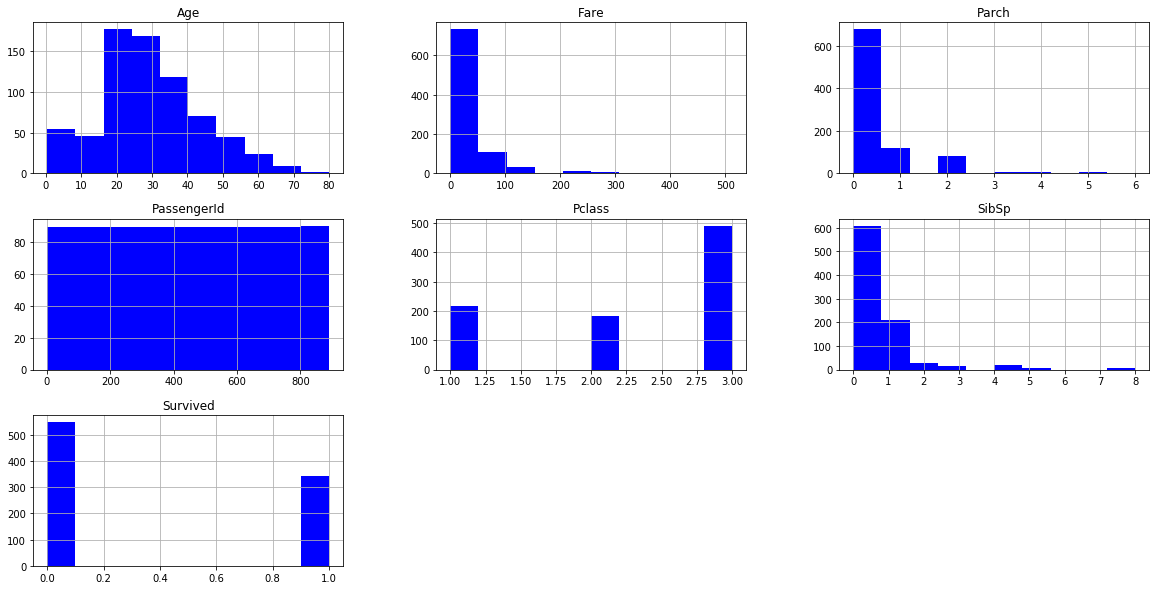

In [6]:
df.hist(figsize=(20,10), color='blue')
plt.show()

One by one:
Age: few children, mostly young people and decreses with age.

Fare: many values between 0 and 50 (pounds?). Might be interesting to change values above 100 to 100 if we are going to 
normalize, which we are not right now

Parch: Most general occurrence is no, some hig number outliers.

PassengerId: not interesting

Pclass: 3rd class was most common, but fair number of 2nd and 1st

Sibsp: Again 0 wins by landslide, some outliers.

Survived: Our target, more deaths than survivals.

Let us see some boxplots:

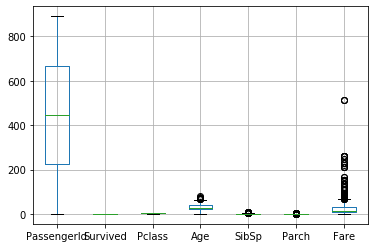

In [7]:
df.boxplot()
plt.show()

Not my best idea this plot, but confirms outliers where I said they were
Let us check for duplicates, and fields with only one value:

In [8]:
df.duplicated().sum()

0

In [9]:
df.apply(pd.Series.nunique) == 1

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

Time to draw he correlation matrix

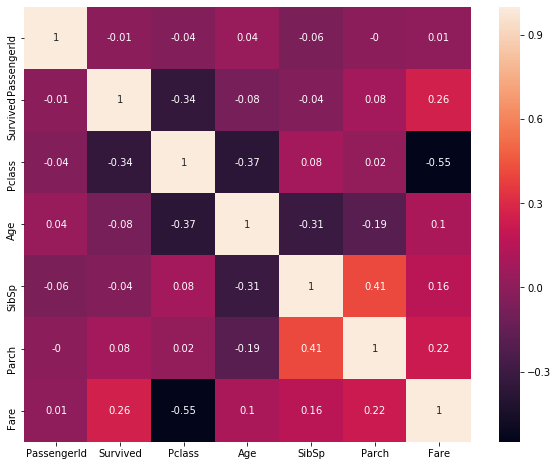

In [10]:
correlation_matrix = df.corr().round(2)
plt.subplots(figsize=(10,8))
cor = sns.heatmap(data=correlation_matrix, annot=True)

Biggest correlation we see is between fare and Pclass, which makes sense.

Now is the time we all love, time to get rid of useless stuff:
PassengerID: useless
Name: Rubbish

In [11]:
df = df.drop(columns=["PassengerId","Name"])


In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Question: Is cabin good for anything? This field could be interesting. Let's see different vaules for cabins

In [13]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Ok, so it's a bit over the place, but seems like the letter stands for the deck, so we could split the variable into deck and room number. We wont right now.

In [14]:
dfWithCabin = df
df = df.drop(columns="Cabin")

How could I have missed that appalling "ticket" collumn. Bye bye

In [15]:
df = df.drop(columns="Ticket")

Let's do some one hot encoding, for the embarked column for now. I am having doubts with the Pclass column but we will leave it be.

In [16]:
df = pd.get_dummies(df, prefix=['Port'], drop_first=True, prefix_sep='_', columns=['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Port_Q,Port_S
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,0,0
2,1,3,female,26.0,0,0,7.9250,0,1
3,1,1,female,35.0,1,0,53.1000,0,1
4,0,3,male,35.0,0,0,8.0500,0,1


Let's make a make a male column and get rid of that Sex one with strings, which our decission tree will dislike

In [17]:
df["Male"] = np.where(df['Sex']=='male', 1, 0)
df = df.drop(columns="Sex")

Let's check for NaNs and such annoyances

In [18]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Port_Q        0
Port_S        0
Male          0
dtype: int64

That is not a column where I want 177 missing values. Let's fill them with the average age for now.

In [19]:
df['Age'].fillna((df['Age'].mean()), inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Port_Q      0
Port_S      0
Male        0
dtype: int64

Ok, I am satisfied with my data for now, time to get the started with the machine learning. Let us split the training set in train and test. We have another test dataset later, but it doesn't have the survived column so we can't use it to validate our model.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df.drop(["Survived"], axis=1), df["Survived"], test_size=0.3, random_state=1)


In [21]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred=tree.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Lived'],
    index  =['Died', 'Lived']
)
print(conf)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       153
           1       0.76      0.63      0.69       115

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.75       268

       Predicted Died  Predicted Lived
Died              130               23
Lived              42               73


Let us take the test dataset and apply the same chages we did to the train one.

In [23]:
dfTest = pd.read_csv("test.csv")
dfTest = dfTest.drop(columns=["Name", "Ticket", "Cabin"])
dfTest = pd.get_dummies(dfTest, prefix=['Port'], drop_first=True, prefix_sep='_', columns=['Embarked'])
dfTest["Male"] = np.where(dfTest['Sex']=='male', 1, 0)
dfTest = dfTest.drop(columns="Sex")
dfTest['Age'].fillna((dfTest['Age'].mean()), inplace=True)
dfTest['Fare'].fillna((dfTest['Fare'].mean()), inplace=True)
dfTest.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Port_Q,Port_S,Male
0,892,3,34.5,0,0,7.8292,1,0,1
1,893,3,47.0,1,0,7.0000,0,1,0
2,894,2,62.0,0,0,9.6875,1,0,1
3,895,3,27.0,0,0,8.6625,0,1,1
4,896,3,22.0,1,1,12.2875,0,1,0


In [24]:
dfTest.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Port_Q         0
Port_S         0
Male           0
dtype: int64

In [25]:
res=tree.predict(dfTest.drop(columns="PassengerId"))

In [26]:
print(res)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0
 1 0 1 0 1 0 0 1 0 0 0]


Lets create a DF with passengerIDs and their predicted outcomes

In [27]:
dfRes = pd.read_csv("test.csv")
len(dfRes)

418

In [30]:
dfRes["Survived"] = res
dfRes

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [31]:
dfRes = dfRes[["PassengerId", "Survived"]]
dfRes

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [33]:
dfRes.to_csv("BDT.csv", index=False)

We have made a prediction using Binary Decision Tree, yielding a 72.727% score in Kaggle. Let us see if we can get better with a Random Forest. 

In [34]:
from sklearn.ensemble import RandomForestClassifier

random_forest=RandomForestClassifier(n_estimators=100, random_state=1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [35]:
from sklearn.metrics import classification_report

y_pred=random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Lived'],
    index  =['Died', 'Lived']
)
print(conf)

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       153
           1       0.79      0.63      0.71       115

    accuracy                           0.77       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.77      0.77       268

       Predicted Died  Predicted Lived
Died              134               19
Lived              42               73


In [36]:
res=random_forest.predict(dfTest.drop(columns="PassengerId"))
dfRes = pd.read_csv("test.csv")
dfRes["Survived"] = res
dfRes = dfRes[["PassengerId", "Survived"]]
dfRes

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [37]:
dfRes.to_csv("RandomForest.csv", index=False)